<a href="https://colab.research.google.com/github/marlanaswann/spr5-kdm1a-conservation-/blob/main/notebooks/Domain_Annotation_of_SPR_5_and_KDM1A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Setup

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


##Step 1: Load InterProScan JSONs

In [17]:
# Load SPR-5 JSON
with open("spr5-interproscan-results.json") as f:
    spr5_data = json.load(f)

# Load KDM1A JSON
with open("kdm1a-interproscan-result.json") as f:
    kdm1a_data = json.load(f)

#Verify the JSON Structure
print(spr5_data.keys())
print(kdm1a_data)

dict_keys(['interproscan-version', 'results'])
{'interproscan-version': '5.76-107.0', 'results': [{'sequence': 'MLSGKKAAAAAAAAAAAATGTEAGPGTAGGSENGSEVAAQPAGLSGPAEVGPGAVGERTPRKKEPPRASPPGGLAEPPGSAGPQAGPTVVPGSATPMETGIAETPEGRRTSRRKRAKVEYREMDESLANLSEDEYYSEEERNAKAEKEKKLPPPPPQAPPEEENESEPEEPSGVEGAAFQSRLPHDRMTSQEAACFPDIISGPQQTQKVFLFIRNRTLQLWLDNPKIQLTFEATLQQLEAPYNSDTVLVHRVHSYLERHGLINFGIYKRIKPLPTKKTGKVIIIGSGVSGLAAARQLQSFGMDVTLLEARDRVGGRVATFRKGNYVADLGAMVVTGLGGNPMAVVSKQVNMELAKIKQKCPLYEANGQAVPKEKDEMVEQEFNRLLEATSYLSHQLDFNVLNNKPVSLGQALEVVIQLQEKHVKDEQIEHWKKIVKTQEELKELLNKMVNLKEKIKELHQQYKEASEVKPPRDITAEFLVKSKHRDLTALCKEYDELAETQGKLEEKLQELEANPPSDVYLSSRDRQILDWHFANLEFANATPLSTLSLKHWDQDDDFEFTGSHLTVRNGYSCVPVALAEGLDIKLNTAVRQVRYTASGCEVIAVNTRSTSQTFIYKCDAVLCTLPLGVLKQQPPAVQFVPPLPEWKTSAVQRMGFGNLNKVVLCFDRVFWDPSVNLFGHVGSTTASRGELFLFWNLYKAPILLALVAGEAAGIMENISDDVIVGRCLAILKGIFGSSAVPQPKETVVSRWRADPWARGSYSYVAAGSSGNDYDLMAQPITPGPSIPGAPQPIPRLFFAGEHTIRNYPATVHGALLSGLREAGRIADQFLGAMYTLPRQATPGVPAQQSPSM', 'md5': '1d679c02f24e571aedf08117d

## Function To Extract Domains

In [18]:
def extract_domains(interpro_json, protein_name):
    """
    Extract domain info from InterProScan JSON
    Returns a DataFrame with columns: Protein, Domain, Start, End, Database, Description
    """
    domains = []
    for entry in interpro_json['results']:
        metadata = entry.get('metadata', {})
        domain_name = metadata.get('name', 'NA')
        db = metadata.get('signature_db', 'NA')  # Pfam, InterPro, SMART, etc.
        description = metadata.get('description', 'NA')
        locations = entry.get('locations', [])
        for loc in locations:
            start = loc.get('start', None)
            end = loc.get('end', None)
            domains.append({
                "Protein": protein_name,
                "Domain": domain_name,
                "Start": start,
                "End": end,
                "Database": db,
                "Function/Notes": description
            })
    return pd.DataFrame(domains)

# Extract domains for both proteins
spr5_domains = extract_domains(spr5_data, "SPR-5")
kdm1a_domains = extract_domains(kdm1a_data, "KDM1A")


# Combine Into One Table

In [28]:
all_domains = pd.concat([spr5_domains, kdm1a_domains], ignore_index=True)
display(all_domains)



,Protein,Domain,Start,End,Database,Function/Notes
0,SPR-5,Homeodomain-like,26,122,SUPERFAMILY,Homedomain-like superfamily
1,SPR-5,"FAD-linked reductases, C-terminal domain",513,620,SUPERFAMILY,"FAD-linked reductases, C-terminal domain"
2,SPR-5,Coil,304,324,COILS,Coil
3,SPR-5,Coil,743,763,COILS,Coil
4,SPR-5,disorder_prediction,718,739,MOBIDB_LITE,consensus disorder prediction
5,SPR-5,FAD/NAD-bd_sf,623,681,GENE3D,FAD/NAD(P)-binding domain superfamily
6,SPR-5,WH-like_DNA-bd_sf,26,128,GENE3D,Winged helix-like DNA-binding domain superfamily
7,SPR-5,FLAVIN MONOAMINE OXIDASE,61,680,PANTHER,Flavin monoamine oxidase and related enzymes
8,SPR-5,SWIRM,40,117,PFAM,SWIRM domain
9,SPR-5,FAD/NAD-bd_sf,130,223,GENE3D,FAD/NAD(P)-binding domain superfamily


## Compare Shared Domains

In [30]:
# Identify shared domains
shared_domains = set(spr5_domains['Domain']).intersection(set(kdm1a_domains['Domain']))
print("Shared domains:", shared_domains)

# Optional: highlight them in the table
all_domains['Shared'] = all_domains['Domain'].apply(lambda x: "Yes" if x in shared_domains else "No")
all_domains


Shared domains: {'FAD/NAD(P)-binding domain', 'G3DSA:1.10.10.10:FF:000064', 'Amino_oxidase', 'WH-like_DNA-bd_sf', 'FAD-linked reductases, C-terminal domain', 'disorder_prediction', 'FLAVIN MONOAMINE OXIDASE', 'SWIRM', 'PIRSR038051-1', 'Coil', 'G3DSA:3.90.660.10', 'Homeodomain-like', 'FAD/NAD-bd_sf', 'Lys-Histone-de-mtase'}


,Protein,Domain,Start,End,Database,Function/Notes,Shared
0,SPR-5,Homeodomain-like,26,122,SUPERFAMILY,Homedomain-like superfamily,Yes
1,SPR-5,"FAD-linked reductases, C-terminal domain",513,620,SUPERFAMILY,"FAD-linked reductases, C-terminal domain",Yes
2,SPR-5,Coil,304,324,COILS,Coil,Yes
3,SPR-5,Coil,743,763,COILS,Coil,Yes
4,SPR-5,disorder_prediction,718,739,MOBIDB_LITE,consensus disorder prediction,Yes
5,SPR-5,FAD/NAD-bd_sf,623,681,GENE3D,FAD/NAD(P)-binding domain superfamily,Yes
6,SPR-5,WH-like_DNA-bd_sf,26,128,GENE3D,Winged helix-like DNA-binding domain superfamily,Yes
7,SPR-5,FLAVIN MONOAMINE OXIDASE,61,680,PANTHER,Flavin monoamine oxidase and related enzymes,Yes
8,SPR-5,SWIRM,40,117,PFAM,SWIRM domain,Yes
9,SPR-5,FAD/NAD-bd_sf,130,223,GENE3D,FAD/NAD(P)-binding domain superfamily,Yes


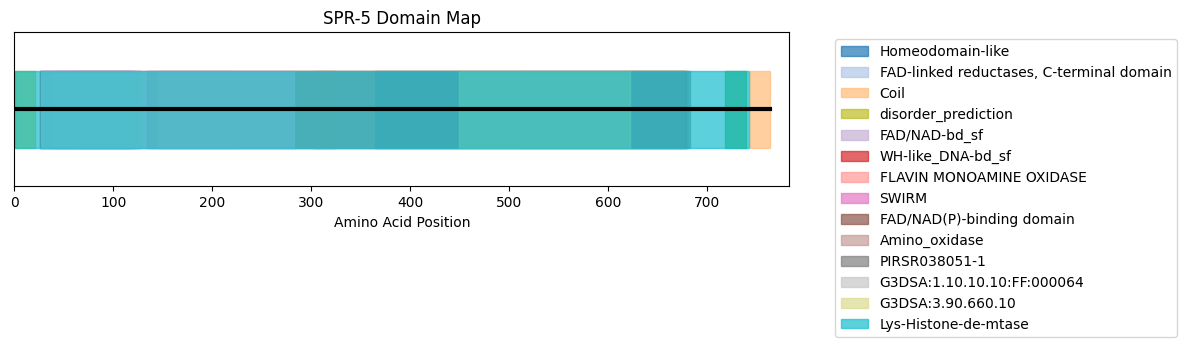

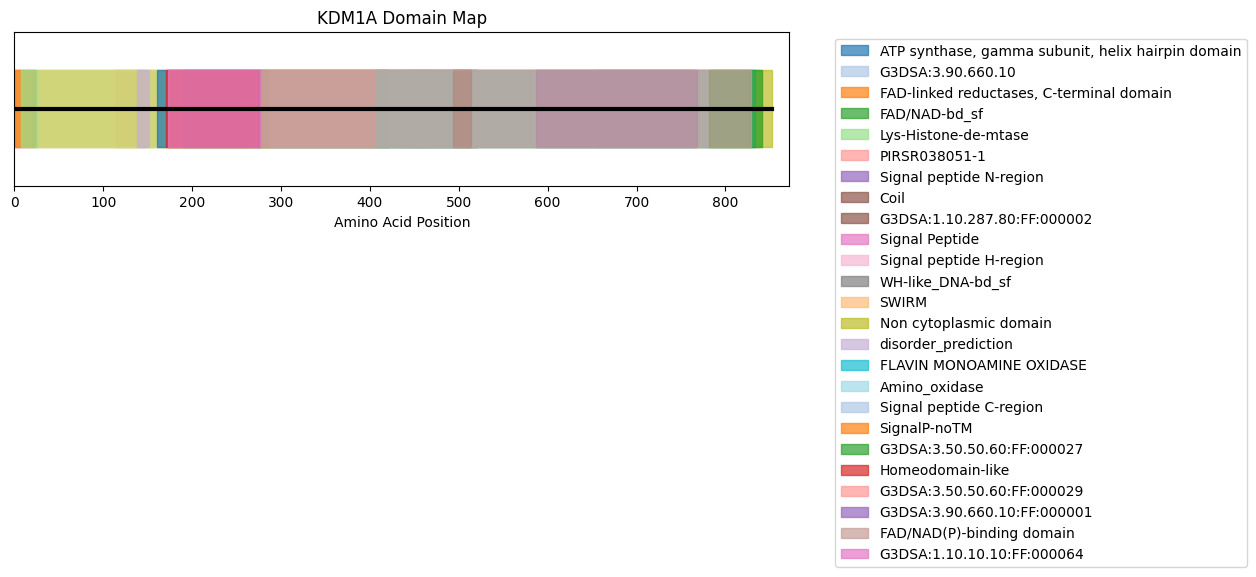

In [33]:
def plot_protein_domains(df, protein_name):
    """
    Draw a linear diagram of protein with domains
    """
    prot_df = df[df['Protein'] == protein_name]
    prot_length = prot_df['End'].max()  # Approximate protein length
    fig, ax = plt.subplots(figsize=(10, 2))

    # Draw protein backbone
    ax.plot([0, prot_length], [0, 0], color='black', linewidth=3)

    colors = plt.cm.tab20.colors
    for i, (_, row) in enumerate(prot_df.iterrows()):
        ax.add_patch(
            mpatches.Rectangle(
                (row['Start'], -0.5),
                row['End'] - row['Start'],
                1,
                color=colors[i % len(colors)],
                alpha=0.7,
                label=row['Domain']
            )
        )

    ax.set_xlim(0, prot_length + 20)
    ax.set_ylim(-1, 1)
    ax.set_yticks([])
    ax.set_xlabel("Amino Acid Position")
    ax.set_title(protein_name + " Domain Map")
    # Add legend outside plot
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Plot both proteins
plot_protein_domains(all_domains, "SPR-5")
plot_protein_domains(all_domains, "KDM1A")

